In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
import os

In [3]:
os.listdir(r"C:\Users\suraj\Downloads\Uber\Datasets")

['other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'other-Diplo_B01196.csv',
 'other-Federal_02216.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Prestige_B01338.csv',
 'other-Skyline_B00111.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [9]:
uber_15 = pd.read_csv(r"C:\Users\suraj\Downloads\Uber\Datasets/uber-raw-data-janjune-15_sample.csv")

In [10]:
uber_15.shape

(100000, 4)

In [11]:
type(uber_15)

pandas.core.frame.DataFrame

In [13]:
uber_15.duplicated().sum()

np.int64(54)

In [14]:
uber_15.drop_duplicates(inplace=True)

In [15]:
uber_15.duplicated().sum()

np.int64(0)

In [16]:
uber_15.shape

(99946, 4)

In [17]:
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [18]:
uber_15.isnull().sum()

Dispatching_base_num       0
Pickup_date                0
Affiliated_base_num     1116
locationID                 0
dtype: int64

In [20]:
uber_15['Pickup_date'][0]

'2015-05-02 21:43:00'

In [22]:
type(uber_15['Pickup_date'][0])

str

In [23]:
uber_15['Pickup_date'] = pd.to_datetime(uber_15['Pickup_date'])

In [24]:
uber_15['Pickup_date'].dtype

dtype('<M8[ns]')

In [25]:
uber_15['Pickup_date'][0]

Timestamp('2015-05-02 21:43:00')

In [26]:
type(uber_15['Pickup_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [27]:
uber_15.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

In [28]:
# WHICH MONTH HAS MAX UBER PICKUP

In [30]:
uber_15['month'] = uber_15['Pickup_date'].dt.month_name()
uber_15['month']

0            May
1        January
2          March
3          April
4          March
          ...   
99995      April
99996      March
99997      March
99998        May
99999       June
Name: month, Length: 99946, dtype: object

In [31]:
uber_15['month'].value_counts()

month
June        19620
May         18660
April       15982
March       15969
February    15896
January     13819
Name: count, dtype: int64

<Axes: xlabel='month'>

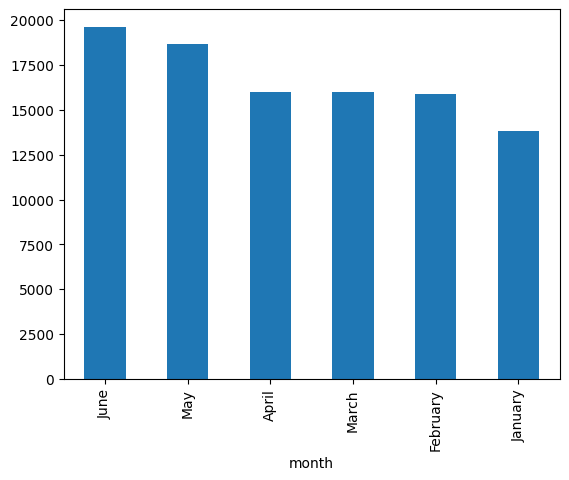

In [33]:
uber_15['month'].value_counts().plot(kind= 'bar')

In [34]:
uber_15['weekday'] = uber_15['Pickup_date'].dt.day_name()
uber_15['day'] = uber_15['Pickup_date'].dt.day
uber_15['hour'] = uber_15['Pickup_date'].dt.hour
uber_15['minute'] = uber_15['Pickup_date'].dt.minute


In [35]:
uber_15.head(5)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,hour,minute
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday,2,21,43
1,B02682,2015-01-20 19:52:59,B02682,231,January,Tuesday,20,19,52
2,B02617,2015-03-19 20:26:00,B02617,161,March,Thursday,19,20,26
3,B02764,2015-04-10 17:38:00,B02764,107,April,Friday,10,17,38
4,B02764,2015-03-23 07:03:00,B00111,140,March,Monday,23,7,3


In [39]:
table = pd.crosstab(index=uber_15['month'], columns=uber_15['weekday'])
table

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,2365,1833,2508,2052,2823,1880,2521
February,2655,1970,2550,2183,2396,2129,2013
January,2508,1353,2745,1651,2378,1444,1740
June,2793,2848,3037,2485,2767,3187,2503
March,2465,2115,2522,2379,2093,2388,2007
May,3262,1865,3519,2944,2627,2115,2328


<Axes: xlabel='month'>

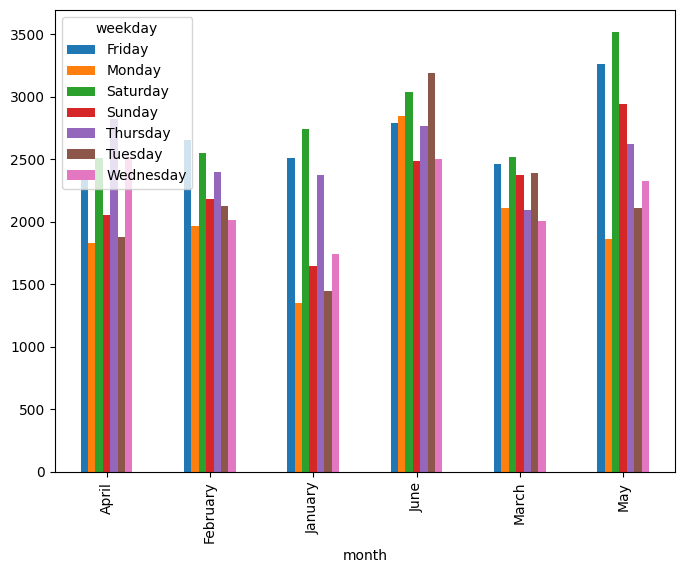

In [43]:
table.plot(kind='bar', figsize=[8,6])

In [44]:
# HOURLY RUSH IN NEWYORK ON DIFFERENT DAYS

In [46]:
table_2 = uber_15.groupby(['weekday', 'hour'], as_index= False).size()
table_2

,weekday,hour,size
0,Friday,0,581
1,Friday,1,333
2,Friday,2,197
3,Friday,3,138
4,Friday,4,161
...,...,...,...
163,Wednesday,19,1044
164,Wednesday,20,897
165,Wednesday,21,949
166,Wednesday,22,900


<Axes: xlabel='hour', ylabel='size'>

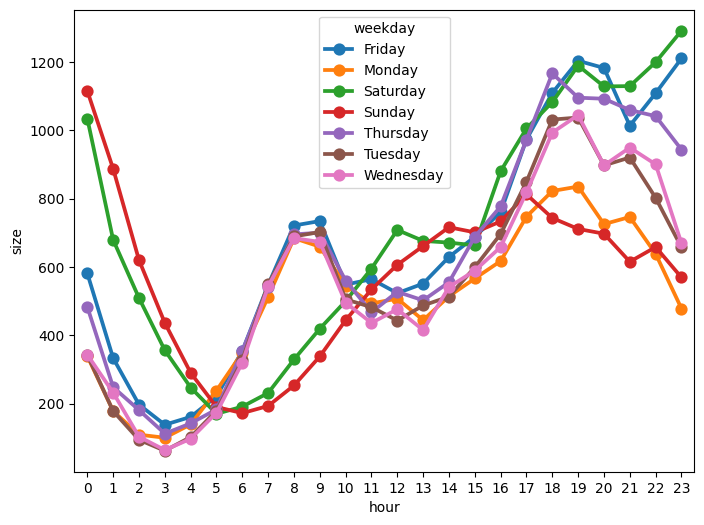

In [48]:
plt.figure(figsize=(8,6))
sns.pointplot(x='hour',y= 'size', hue='weekday',data= table_2)

In [49]:
# WHICH  BASE_NUMBER HAS MOST NUMBER OF ACTIVE VEHICLE ???


In [6]:
import pandas as pd
uber_foil = pd.read_csv(r"C:\Users\suraj\Downloads\Uber\Datasets/Uber-Jan-Feb-FOIL.csv")
uber_foil

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537
...,...,...,...,...
349,B02764,2/28/2015,3952,39812
350,B02617,2/28/2015,1372,14022
351,B02682,2/28/2015,1386,14472
352,B02512,2/28/2015,230,1803


In [8]:
uber_foil.shape

(354, 4)

In [11]:
! pip install chart_studio
! pip install plotly

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [13]:
init_notebook_mode (connected= True)

In [14]:
uber_foil.columns

Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')

In [15]:
px.box(x='dispatching_base_number',y='active_vehicles',data_frame=uber_foil)

In [16]:
# COLLECT ENTIRE DATA AND MAKE IT READY FOR EDA

In [22]:
import os 
files = os.listdir(r"C:\Users\suraj\Downloads\Uber\Datasets")[-8:]
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [23]:
files.remove('uber-raw-data-janjune-15.csv')

In [24]:
files.remove('uber-raw-data-janjune-15_sample.csv')

In [25]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [26]:
final = pd.DataFrame()
path = r"C:\Users\suraj\Downloads\Uber\Datasets"

for file in files:
    current_df = pd.read_csv(path+'/'+file)
    final = pd.concat([current_df,final])

In [27]:
final.shape

(4534327, 4)

In [28]:
final.duplicated().sum()

np.int64(82581)

In [29]:
final.drop_duplicates(inplace=True)

In [30]:
final.shape

(4451746, 4)

In [31]:
final.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [32]:
#AT WHAT LOCATION OF NEWYORK CITY WE ARE GETTING RUSH

In [35]:
uber_rush = final.groupby(['Lat','Lon'], as_index=False).size()
uber_rush

,Lat,Lon,size
0,39.6569,-74.2258,1
1,39.6686,-74.1607,1
2,39.7214,-74.2446,1
3,39.8416,-74.1512,1
4,39.9055,-74.0791,1
...,...,...,...
574553,41.3730,-72.9237,1
574554,41.3737,-73.7988,1
574555,41.5016,-72.8987,1
574556,41.5276,-72.7734,1


In [36]:
! pip install folium

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import folium
basemap = folium.Map()
basemap


In [44]:
from folium.plugins import HeatMap

In [45]:
HeatMap(uber_rush).add_to(basemap)

In [ ]:
basemap